# Assignment 2

## Tulika Garg

### 1. Download the dataset: Dataset

### 2. Load the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("titanic.csv") #reading the csv file
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### 3. Perform Below Visualizations.
### ● Univariate Analysis

In [3]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

Text(0, 0.5, 'age')

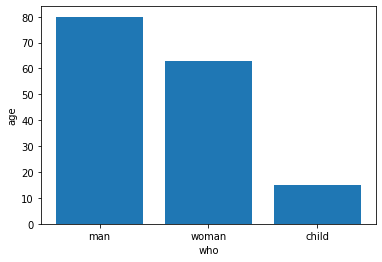

In [4]:
#bar plot
plt.bar(df['who'],df['age'])
plt.xlabel("who")
plt.ylabel("age")

(array([537.,   0.,   0.,   0.,   0., 271.,   0.,   0.,   0.,  83.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

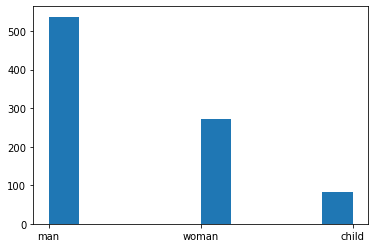

In [5]:
#histogram
plt.hist(df['who'])

### ● Bi - Variate Analysis

Text(0, 0.5, 'fare')

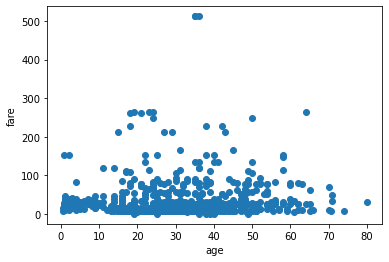

In [6]:
plt.scatter(df['age'],df['fare'])
plt.xlabel('age')
plt.ylabel('fare')

### ● Multi - Variate Analysis

In [7]:
cor=df.corr()
cor

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


<AxesSubplot:>

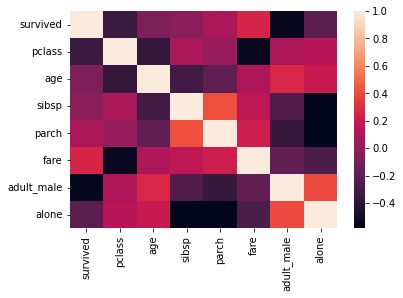

In [8]:
sns.heatmap(cor)

### 4. Perform descriptive statistics on the dataset.

In [9]:
# Selecting only numerical columns to perform descriptive statistics
data=df.loc[:,['survived','pclass','age','sibsp','parch','fare']]
data.head()

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [10]:
# measure of central tendency - mean,median,mode

#mean
data.mean()

survived     0.383838
pclass       2.308642
age         29.699118
sibsp        0.523008
parch        0.381594
fare        32.204208
dtype: float64

In [11]:
#median
data.median()

survived     0.0000
pclass       3.0000
age         28.0000
sibsp        0.0000
parch        0.0000
fare        14.4542
dtype: float64

In [12]:
#mode
data.mode()

,survived,pclass,age,sibsp,parch,fare
0,0,3,24.0,0,0,8.05


In [13]:
#Measure of Variability - Range, Variance, Standard Deviation

#range
data.max()

survived      1.0000
pclass        3.0000
age          80.0000
sibsp         8.0000
parch         6.0000
fare        512.3292
dtype: float64

In [14]:
data.min()

survived    0.00
pclass      1.00
age         0.42
sibsp       0.00
parch       0.00
fare        0.00
dtype: float64

In [15]:
df_range=data.max()-data.min()
df_range

survived      1.0000
pclass        2.0000
age          79.5800
sibsp         8.0000
parch         6.0000
fare        512.3292
dtype: float64

In [16]:
#variance
data.var()

survived       0.236772
pclass         0.699015
age          211.019125
sibsp          1.216043
parch          0.649728
fare        2469.436846
dtype: float64

In [17]:
#standard deviation
data.std()

survived     0.486592
pclass       0.836071
age         14.526497
sibsp        1.102743
parch        0.806057
fare        49.693429
dtype: float64

### 5. Handle the Missing values.

In [18]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [19]:
#age - numerical data (replacing with mean)
df['age'].fillna(df['age'].mean(),inplace=True)
df['age'].isnull().sum()

0

In [20]:
#embarked, deck, embark_town - categorical data (replacing with mode)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embarked'].isnull().sum()

0

In [21]:
df['deck'].fillna(df['deck'].mode()[0], inplace=True)
df['deck'].isnull().sum()

0

In [22]:
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)
df['embark_town'].isnull().sum()

0

In [23]:
#After handling the missing values
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

### 6. Find the outliers and replace the outliers

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

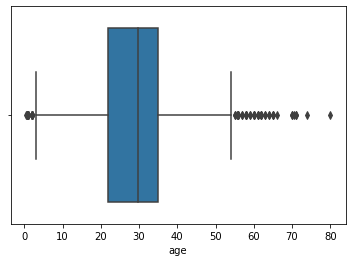

In [24]:
sns.boxplot(df['age'])

In [25]:
Q1_age=df['age'].quantile(0.25)
Q3_age=df['age'].quantile(0.75)
IQR_age=Q3_age-Q1_age
lower_bound=Q1_age-1.5*IQR_age
upper_bound=Q3_age+1.5*IQR_age
outliers_age=df[(df['age']<lower_bound) | (df['age']>upper_bound)]
outliers_age

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
11,1,1,female,58.00,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
15,1,2,female,55.00,0,0,16.0000,S,Second,woman,False,C,Southampton,yes,True
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,C,Queenstown,no,False
33,0,2,male,66.00,0,0,10.5000,S,Second,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,1,2,male,1.00,0,2,37.0042,C,Second,child,False,C,Cherbourg,yes,False
829,1,1,female,62.00,0,0,80.0000,S,First,woman,False,B,Southampton,yes,True
831,1,2,male,0.83,1,1,18.7500,S,Second,child,False,C,Southampton,yes,False
851,0,3,male,74.00,0,0,7.7750,S,Third,man,True,C,Southampton,no,True


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

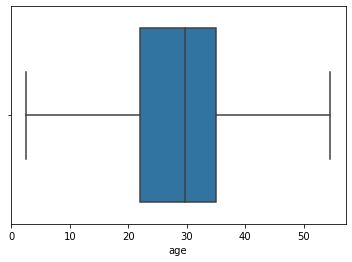

In [26]:
df['age']=np.where((df['age']<lower_bound), lower_bound, df['age'])
df['age']=np.where((df['age']>upper_bound), upper_bound, df['age'])

sns.boxplot(df['age']) #After replacing the outliers

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sibsp'>

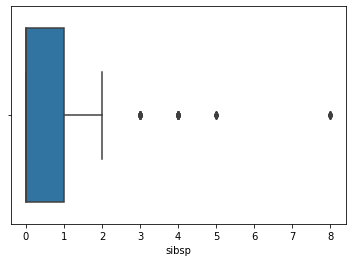

In [27]:
sns.boxplot(df['sibsp'])

In [28]:
Q1_sibsp=df['sibsp'].quantile(0.25)
Q3_sibsp=df['sibsp'].quantile(0.75)
IQR_sibsp=Q3_sibsp-Q1_sibsp
lower_bound=Q1_sibsp-1.5*IQR_sibsp
upper_bound=Q3_sibsp+1.5*IQR_sibsp
outliers_sibsp=df[(df['sibsp']<lower_bound) | (df['sibsp']>upper_bound)]
outliers_sibsp

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.500000,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
16,0,3,male,2.500000,4,1,29.1250,Q,Third,child,False,C,Queenstown,no,False
24,0,3,female,8.000000,3,1,21.0750,S,Third,child,False,C,Southampton,no,False
27,0,1,male,19.000000,3,2,263.0000,S,First,man,True,C,Southampton,no,False
50,0,3,male,7.000000,4,1,39.6875,S,Third,child,False,C,Southampton,no,False
59,0,3,male,11.000000,5,2,46.9000,S,Third,child,False,C,Southampton,no,False
63,0,3,male,4.000000,3,2,27.9000,S,Third,child,False,C,Southampton,no,False
68,1,3,female,17.000000,4,2,7.9250,S,Third,woman,False,C,Southampton,yes,False
71,0,3,female,16.000000,5,2,46.9000,S,Third,woman,False,C,Southampton,no,False
85,1,3,female,33.000000,3,0,15.8500,S,Third,woman,False,C,Southampton,yes,False


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sibsp'>

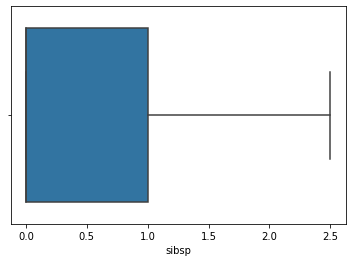

In [29]:
df['sibsp']=np.where((df['sibsp']<lower_bound), lower_bound, df['sibsp'])
df['sibsp']=np.where((df['sibsp']>upper_bound), upper_bound, df['sibsp'])

sns.boxplot(df['sibsp']) #After replacing the outliers

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parch'>

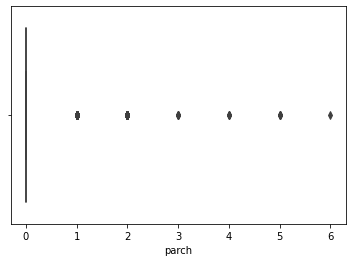

In [30]:
sns.boxplot(df['parch'])

In [31]:
Q1_parch=df['parch'].quantile(0.25)
Q3_parch=df['parch'].quantile(0.75)
IQR_parch=Q3_parch-Q1_parch
lower_bound=Q1_parch-1.5*IQR_parch
upper_bound=Q3_parch+1.5*IQR_parch
outliers_parch=df[(df['parch']<lower_bound) | (df['parch']>upper_bound)]
outliers_parch

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
7,0,3,male,2.500000,2.5,1,21.0750,S,Third,child,False,C,Southampton,no,False
8,1,3,female,27.000000,0.0,2,11.1333,S,Third,woman,False,C,Southampton,yes,False
10,1,3,female,4.000000,1.0,1,16.7000,S,Third,child,False,G,Southampton,yes,False
13,0,3,male,39.000000,1.0,5,31.2750,S,Third,man,True,C,Southampton,no,False
16,0,3,male,2.500000,2.5,1,29.1250,Q,Third,child,False,C,Queenstown,no,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.000000,1.0,1,52.5542,S,First,woman,False,D,Southampton,yes,False
879,1,1,female,54.500000,0.0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.000000,0.0,1,26.0000,S,Second,woman,False,C,Southampton,yes,False
885,0,3,female,39.000000,0.0,5,29.1250,Q,Third,woman,False,C,Queenstown,no,False


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='parch'>

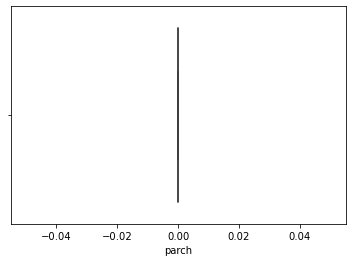

In [32]:
df['parch']=np.where((df['parch']<lower_bound), lower_bound, df['parch'])
df['parch']=np.where((df['parch']>upper_bound), upper_bound, df['parch'])

sns.boxplot(df['parch']) #After replacing the outliers

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

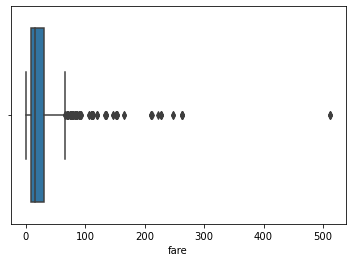

In [33]:
sns.boxplot(df['fare'])

In [34]:
Q1_fare=df['fare'].quantile(0.25)
Q3_fare=df['fare'].quantile(0.75)
IQR_fare=Q3_fare-Q1_fare
lower_bound=Q1_fare-1.5*IQR_fare
upper_bound=Q3_fare+1.5*IQR_fare
outliers_fare=df[(df['fare']<lower_bound) | (df['fare']>upper_bound)]
outliers_fare

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.000000,1.0,0.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
27,0,1,male,19.000000,2.5,0.0,263.0000,S,First,man,True,C,Southampton,no,False
31,1,1,female,29.699118,1.0,0.0,146.5208,C,First,woman,False,B,Cherbourg,yes,False
34,0,1,male,28.000000,1.0,0.0,82.1708,C,First,man,True,C,Cherbourg,no,False
52,1,1,female,49.000000,1.0,0.0,76.7292,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,0,3,male,29.699118,2.5,0.0,69.5500,S,Third,man,True,C,Southampton,no,False
849,1,1,female,29.699118,1.0,0.0,89.1042,C,First,woman,False,C,Cherbourg,yes,False
856,1,1,female,45.000000,1.0,0.0,164.8667,S,First,woman,False,C,Southampton,yes,False
863,0,3,female,29.699118,2.5,0.0,69.5500,S,Third,woman,False,C,Southampton,no,False


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

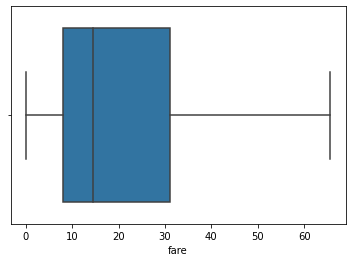

In [35]:
df['fare']=np.where((df['fare']<lower_bound), lower_bound, df['fare'])
df['fare']=np.where((df['fare']>upper_bound), upper_bound, df['fare'])

sns.boxplot(df['fare']) #After replacing the outliers

### 7. Check for Categorical columns and perform encoding.

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
df.info() #dtype='object' means the column is a categorical column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   sibsp        891 non-null    float64
 5   parch        891 non-null    float64
 6   fare         891 non-null    float64
 7   embarked     891 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         891 non-null    object 
 12  embark_town  891 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(4), int64(2), object(7)
memory usage: 92.4+ KB


In [38]:
LE=LabelEncoder()
df.sex=LE.fit_transform(df.sex)
df.embarked=LE.fit_transform(df.embarked)
df['class']=LE.fit_transform(df['class'])
df.who=LE.fit_transform(df.who)
df.adult_male=LE.fit_transform(df.adult_male)
df.deck=LE.fit_transform(df.deck)
df.embark_town=LE.fit_transform(df.embark_town)
df.alive=LE.fit_transform(df.alive)
df.alone=LE.fit_transform(df.alone)

df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.000000,1.0,0.0,7.2500,2,2,1,1,2,2,0,0
1,1,1,0,38.000000,1.0,0.0,65.6344,0,0,2,0,2,0,1,0
2,1,3,0,26.000000,0.0,0.0,7.9250,2,2,2,0,2,2,1,1
3,1,1,0,35.000000,1.0,0.0,53.1000,2,0,2,0,2,2,1,0
4,0,3,1,35.000000,0.0,0.0,8.0500,2,2,1,1,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0.0,0.0,13.0000,2,1,1,1,2,2,0,1
887,1,1,0,19.000000,0.0,0.0,30.0000,2,0,2,0,1,2,1,1
888,0,3,0,29.699118,1.0,0.0,23.4500,2,2,2,0,2,2,0,0
889,1,1,1,26.000000,0.0,0.0,30.0000,0,0,1,1,2,0,1,1


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int32  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    float64
 5   parch        891 non-null    float64
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int32  
 8   class        891 non-null    int32  
 9   who          891 non-null    int32  
 10  adult_male   891 non-null    int64  
 11  deck         891 non-null    int32  
 12  embark_town  891 non-null    int32  
 13  alive        891 non-null    int32  
 14  alone        891 non-null    int64  
dtypes: float64(4), int32(7), int64(4)
memory usage: 80.2 KB


### 8. Split the data into dependent and independent variables.

In [40]:
#Y - survived (the dependent variable - target)
y=df['survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [41]:
#X - other columns except survived (the independent variables - predictors)
x=df.drop(columns=['survived'],axis=1)
x.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,3,1,22.0,1.0,0.0,7.2500,2,2,1,1,2,2,0,0
1,1,0,38.0,1.0,0.0,65.6344,0,0,2,0,2,0,1,0
2,3,0,26.0,0.0,0.0,7.9250,2,2,2,0,2,2,1,1
3,1,0,35.0,1.0,0.0,53.1000,2,0,2,0,2,2,1,0
4,3,1,35.0,0.0,0.0,8.0500,2,2,1,1,2,2,0,1


### 9. Scale the independent variables

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
names=x.columns
names

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class',
       'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')

In [44]:
mmsc=MinMaxScaler() 
x_scaled=mmsc.fit_transform(x)
x_scaled

array([[1.        , 1.        , 0.375     , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.68269231, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.        , 0.45192308, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [1.        , 0.        , 0.52305995, ..., 1.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.45192308, ..., 0.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.56730769, ..., 0.5       , 0.        ,
        1.        ]])

In [45]:
x=pd.DataFrame(x_scaled,columns=names)
x

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,1.0,1.0,0.375000,0.4,0.0,0.110460,1.0,1.0,0.5,1.0,0.333333,1.0,0.0,0.0
1,0.0,0.0,0.682692,0.4,0.0,1.000000,0.0,0.0,1.0,0.0,0.333333,0.0,1.0,0.0
2,1.0,0.0,0.451923,0.0,0.0,0.120745,1.0,1.0,1.0,0.0,0.333333,1.0,1.0,1.0
3,0.0,0.0,0.625000,0.4,0.0,0.809027,1.0,0.0,1.0,0.0,0.333333,1.0,1.0,0.0
4,1.0,1.0,0.625000,0.0,0.0,0.122649,1.0,1.0,0.5,1.0,0.333333,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.5,1.0,0.471154,0.0,0.0,0.198067,1.0,0.5,0.5,1.0,0.333333,1.0,0.0,1.0
887,0.0,0.0,0.317308,0.0,0.0,0.457077,1.0,0.0,1.0,0.0,0.166667,1.0,1.0,1.0
888,1.0,0.0,0.523060,0.4,0.0,0.357282,1.0,1.0,1.0,0.0,0.333333,1.0,0.0,0.0
889,0.0,1.0,0.451923,0.0,0.0,0.457077,0.0,0.0,0.5,1.0,0.333333,0.0,1.0,1.0


### 10. Split the data into training and testing

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [48]:
x_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
140,1.0,0.0,0.523060,0.0,0.0,0.232284,0.0,1.0,1.0,0.0,0.333333,0.0,0.0,0.0
439,0.5,1.0,0.548077,0.0,0.0,0.159977,1.0,0.5,0.5,1.0,0.333333,1.0,0.0,1.0
817,0.5,1.0,0.548077,0.4,0.0,0.563793,0.0,0.5,0.5,1.0,0.333333,0.0,0.0,0.0
378,1.0,1.0,0.336538,0.0,0.0,0.061134,0.0,1.0,0.5,1.0,0.333333,0.0,0.0,1.0
491,1.0,1.0,0.355769,0.0,0.0,0.110460,1.0,1.0,0.5,1.0,0.333333,1.0,0.0,1.0


In [49]:
x_test.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
495,1.0,1.0,0.523060,0.0,0.0,0.220285,0.0,1.0,0.5,1.0,0.333333,0.0,0.0,1.0
648,1.0,1.0,0.523060,0.0,0.0,0.115031,1.0,1.0,0.5,1.0,0.333333,1.0,0.0,1.0
278,1.0,1.0,0.086538,1.0,0.0,0.443746,0.5,1.0,0.0,0.0,0.333333,0.5,0.0,0.0
31,0.0,0.0,0.523060,0.4,0.0,1.000000,0.0,0.0,1.0,0.0,0.166667,0.0,1.0,0.0
255,1.0,0.0,0.509615,0.0,0.0,0.232284,0.0,1.0,1.0,0.0,0.333333,0.0,1.0,0.0


In [50]:
y_train

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: survived, Length: 712, dtype: int64

In [51]:
y_test

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: survived, Length: 179, dtype: int64